In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import pandas
pandas.set_option('display.max_rows', 1000)

from lsst.rsp import get_tap_service, retrieve_query

import lsst.daf.butler as dafButler

import lsst.geom
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend('matplotlib')

# Butler

In [2]:
# collection = '2.2i/runs/test-med-1/v23_0_0_rc2/PREOPS-863'
# collection = '2.2i/runs/DP0.2/v23_0_2/PREOPS-905/step_all'

In [3]:
config = 'dp02'
collection = '2.2i/runs/DP0.2'

butler = dafButler.Butler(config, collections=collection)

registry = butler.registry

In [4]:
# for c in sorted(registry.queryCollections()):
#     print(c)

In [18]:
for x in sorted(registry.queryDatasetTypes()):
    temp = str(x)
    # if temp.find('ExposureF') > -1:
    if temp.find('DataFrame') > -1:
        print(temp)

DatasetType('CcdVisitTable', {instrument}, DataFrame)
DatasetType('DiaSourceTable', {band, instrument, physical_filter, visit_system, visit}, DataFrame)
DatasetType('calibratedSource', {band, instrument, detector, physical_filter, visit_system, visit}, DataFrame)
DatasetType('calibratedSourceTable', {band, instrument, detector, physical_filter, visit_system, visit}, DataFrame)
DatasetType('calibratedSourceTable_visit', {band, instrument, physical_filter, visit_system, visit}, DataFrame)
DatasetType('ccdVisitTable', {instrument}, DataFrame)
DatasetType('cosmodc2_1_1_4_redmapper_v0_8_1_redgals', {}, DataFrame)
DatasetType('deepCoadd_obj', {skymap, tract, patch}, DataFrame)
DatasetType('diaObjectTable_tract', {skymap, tract}, DataFrame)
DatasetType('diaSourceTable', {band, instrument, physical_filter, visit_system, visit}, DataFrame)
DatasetType('diaSourceTable_tract', {skymap, tract}, DataFrame)
DatasetType('diff_matched_truth_summary_objectTable_tract', {skymap, tract}, DataFrame)
Datas

In [ ]:
# dataId = {'skymap': 'DC2', 'tract': 4431, 'patch': 17}
# objs = butler.get('objectTable', dataId)
# objs.columns

In [ ]:
# dataId = {'visit': 919515, 'detector': 80}
# srcs = butler.get('sourceTable', dataId)
# srcs.columns

In [ ]:
# dataId = {'skymap': 'DC2', 'tract': 4431, 'patch': 17}
# fsrcs = butler.get('forcedSourceTable', dataId)
# fsrcs.columns
# print(len(fsrcs.columns))

In [ ]:
# dataId = {'skymap': 'DC2', 'tract': 4431}
# dobjs = butler.get('diaObjectTable_tract', dataId)
# dobjs.columns

In [17]:
# dataId = {'skymap': 'DC2', 'tract': 4431}
# dsrcs = butler.get('diaSourceTable_tract', dataId)
# dsrcs.columns
# print(len(dsrcs.columns))

66


In [19]:
dataId = {'visit': 919515, 'detector': 80}
dsrcs = butler.get('diaSourceTable', dataId)
dsrcs.columns
print(len(dsrcs.columns))

65


In [ ]:
# dataId = {'skymap': 'DC2', 'tract': 4431}
# dfsrcs = butler.get('forcedSourceOnDiaObjectTable_tract', dataId)
# dfsrcs.columns
# print(len(dfsrcs.columns))

## Images, Difference Images

(11899.5, 16099.5, 7899.5, 12099.5)

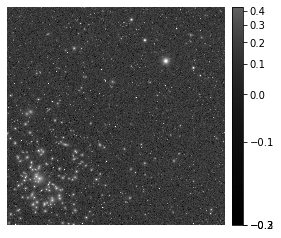

In [9]:
# dataId = {'band': 'i', 'tract': 4431, 'patch': 17}
# my_deepCoadd = butler.get('deepCoadd', dataId=dataId)
# fig = plt.figure(figsize=(6, 4))
# afw_display = afwDisplay.Display(1)
# afw_display.scale('asinh', 'zscale')
# afw_display.mtv(my_deepCoadd.image)
# plt.gca().axis('off')

(11899.5, 16099.5, 7899.5, 12099.5)

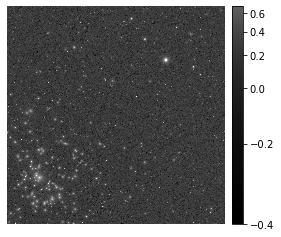

In [10]:
# dataId = {'band': 'i', 'tract': 4431, 'patch': 17}
# my_goodSeeingCoadd = butler.get('goodSeeingCoadd', dataId=dataId)
# fig = plt.figure(figsize=(6, 4))
# afw_display = afwDisplay.Display(1)
# afw_display.scale('asinh', 'zscale')
# afw_display.mtv(my_goodSeeingCoadd.image)
# plt.gca().axis('off')

(-0.5, 4071.5, -0.5, 3999.5)

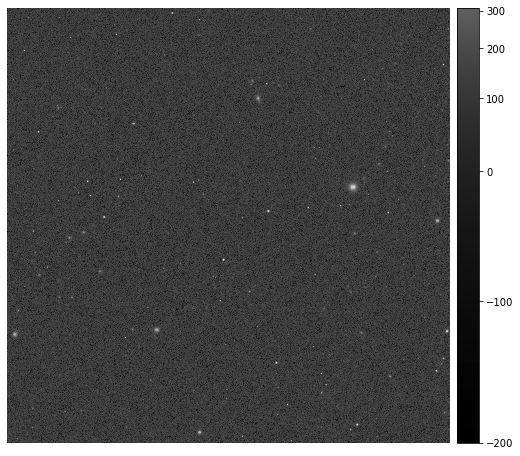

In [14]:
dataId = {'band': 'i', 'visit': 919515, 'detector': 80}
my_calexp = butler.get('calexp', dataId=dataId)
fig = plt.figure(figsize=(12, 8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(my_calexp.image)
plt.gca().axis('off')

(-0.5, 4071.5, -0.5, 3999.5)

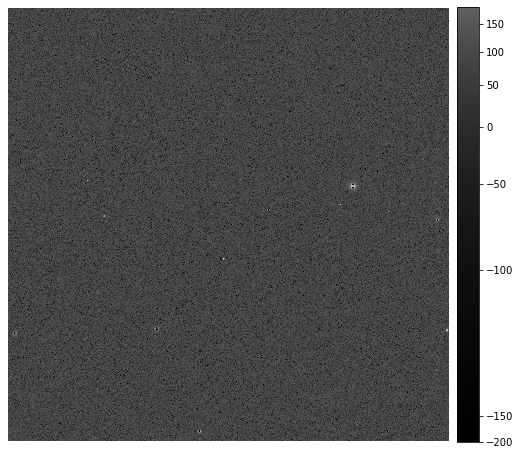

In [15]:
dataId = {'band': 'i', 'visit': 919515, 'detector': 80}
my_gSDdE = butler.get('goodSeeingDiff_differenceExp', dataId=dataId)
fig = plt.figure(figsize=(12, 8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(my_gSDdE.image)
plt.gca().axis('off')

(-10.5, 4081.5, -10.5, 4009.5)

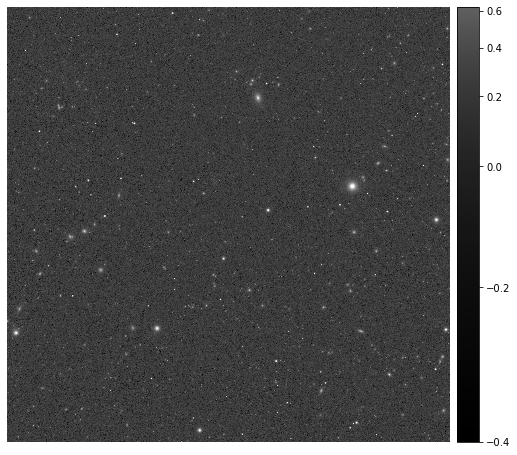

In [16]:
dataId = {'band': 'i', 'visit': 919515, 'detector': 80}
my_gSDtE = butler.get('goodSeeingDiff_templateExp', dataId=dataId)
fig = plt.figure(figsize=(12, 8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(my_gSDtE.image)
plt.gca().axis('off')

## Look for truth data

In [ ]:
config = 'dp02'

In [ ]:
collection = '2.2i/truth_summary'

In [ ]:
butler = dafButler.Butler(config, collections=collection)
registry = butler.registry

In [ ]:
for c in sorted(registry.queryCollections()):
    temp = str(c)
    if temp.find('truth') > -1:
        print(temp)

In [ ]:
for x in sorted(registry.queryDatasetTypes()):
    temp = str(x)
    if temp.find('truth') > -1:
        print(temp)

In [ ]:
for c in sorted(registry.queryCollections(collection, flattenChains=True)):
    print(c, registry.getCollectionType(c))

In [ ]:
### For example, grab truth_summary for a tract
dataId = {'tract': 3829}
data = butler.get('truth_summary', dataId)

In [ ]:
data.columns

<br><br>

## DiaObjects

DiaObjects via the Butler.

In [ ]:
config = 'dp02'
collection = '2.2i/runs/DP0.2/v23_0_2/PREOPS-905/step_all'
butler = dafButler.Butler(config, collections=collection)

In [ ]:
import lsst.sphgeom
pixelization = lsst.sphgeom.HtmPixelization(11)

In [ ]:
htm_id = pixelization.index(
    lsst.sphgeom.UnitVector3d(
        lsst.sphgeom.LonLat.fromDegrees(57.5, -36.5)
    )
)

# Obtain and print the scale to provide a sense of the size of the sky pixelization being used
scale = pixelization.triangle(htm_id).getBoundingCircle().getOpeningAngle().asDegrees()*3600
print(f'HTM ID={htm_id} at level={pixelization.getLevel()} is a ~{scale:0.2}" triangle.')

In [ ]:
datasetRefs = registry.queryDatasets("diaObjectTable_tract", htm20=htm_id)

In [ ]:
for i, ref in enumerate(datasetRefs):
    print(i, ref)
    if i > 6:
        break

In [ ]:
dataId = {'tract': 3829}
my_diaObjects = butler.get('diaObjectTable_tract', dataId)
my_diaSources = butler.get('diaSourceTable_tract', dataId)

In [ ]:
print(len(my_diaObjects))
print(len(my_diaSources))

In [ ]:
# my_diaObjects

In [ ]:
diaO_id  = my_diaObjects.index.to_numpy()
diaO_ra  = my_diaObjects.ra.to_numpy()
diaO_dec = my_diaObjects.decl.to_numpy()

diaO_gPSMagMin = -2.5 * np.log10(my_diaObjects.gPSFluxMax.to_numpy()/1.0e32) - 48.60
diaO_rPSMagMin = -2.5 * np.log10(my_diaObjects.rPSFluxMax.to_numpy()/1.0e32) - 48.60
diaO_iPSMagMin = -2.5 * np.log10(my_diaObjects.iPSFluxMax.to_numpy()/1.0e32) - 48.60

diaO_nDiaSources = my_diaObjects.nDiaSources.to_numpy()

In [ ]:
# plt.hist( diaO_nDiaSources, bins=20, log=True )
# plt.show()

In [ ]:
# plt.hist( diaO_gPSMagMin, bins=20, log=True )
# plt.show()

In [ ]:
# plt.plot( diaO_ra, diaO_dec, 'o', ms=2, alpha=0.05 )
# plt.show()

In [ ]:
# my_diaSources

In [ ]:
diaS_diaObjectId = my_diaSources.diaObjectId.to_numpy()

diaS_filterName  = my_diaSources.filterName.to_numpy()
diaS_midPointTai = my_diaSources.midPointTai.to_numpy()
diaS_psFlux      = my_diaSources.psFlux.to_numpy()
diaS_psFluxErr   = my_diaSources.psFluxErr.to_numpy()
diaS_psMag       = -2.5 * np.log10(diaS_psFlux/1.0e32) - 48.60

upperflux        = diaS_psFlux + diaS_psFluxErr
lowermag         = -2.5 * np.log10(upperflux/1.0e32) - 48.60
diaS_psMagErr    = diaS_psMag - lowermag
del upperflux, lowermag

Making durations takes a while so probably you only want to do this for the potential SNIa-like ones in reality.

In [ ]:
# diaO_duration = np.zeros( len(diaO_id), dtype='float' )

# for i in range(len(diaO_id)):
#     sx = np.where( diaS_diaObjectId == diaO_id[i] )[0]
#     if len(sx) > 1:
#         diaO_duration[i] = np.max(diaS_midPointTai[sx]) - np.min(diaS_midPointTai[sx])

In [ ]:
# plt.hist( diaO_duration, bins=20, log=True )
# plt.show()

In [ ]:
# tx = np.where( (diaO_nDiaSources > 15) & \
#                (diaO_rPSMagMin > 18.0) & \
#                (diaO_rPSMagMin < 22.5) & \
#                (diaO_duration > 10.0)  & \
#                (diaO_duration < 200.0) )[0]
# print(len(tx))

In [ ]:
# plt.hist( diaO_nDiaSources[tx], bins=20 )
# plt.show()

In [ ]:
# filter_names = ['u', 'g', 'r', 'i', 'z', 'y']
# filter_color = ['darkviolet', 'darkgreen', 'red', 'darkorange', 'brown', 'black']
# filter_symbol = ['o', '^', 'v', 's', '*', 'p']

In [ ]:
# fig, ax = plt.subplots( 3, 5, figsize=(20,10), sharey=False, sharex=False)

# i = 0
# j = 0

# for t in tx:
#     sx = np.where( diaS_diaObjectId == diaO_id[t] )[0]
#     for f, filt in enumerate(filter_names):
#         fx = np.where(diaS_filterName[sx] == filt)[0]
#         ax[i,j].plot(diaS_midPointTai[sx[fx]], diaS_psMag[sx[fx]],
#                        filter_symbol[f], ms=15, mew=0, alpha=0.5, color=filter_color[f])
#         del fx
#     ax[i,j].set_ylim([np.nanmax(diaS_psMag[sx])+0.2, np.nanmin(diaS_psMag[sx])-0.2])
#     j += 1
#     if j == 5:
#         j = 0
#         i += 1
    
# plt.show()